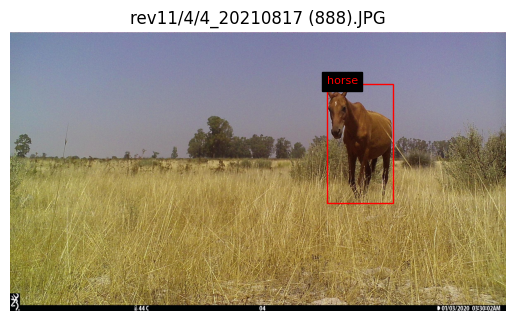

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

PATH = "../"
input_csv_file = PATH + "Data/CSVs/dataset_caltech_bb.csv"

# Load the CSV file
df = pd.read_csv(input_csv_file)

# Select a random row
random_row = df.sample(n=1, random_state=random.randint(0, 1000)).iloc[0]

# Function to plot image with bounding box
def plot_image_with_bbox(row):
    image_path = PATH + "Dataset/" + row['path']
    img = Image.open(image_path)
    img_width, img_height = img.size

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(row['path'])

    bboxes = eval(row['bounding_boxes']) if isinstance(row['bounding_boxes'], str) else []
    for bbox in bboxes:
        class_label = bbox[0]
        x_min, y_min, width, height = [float(coord) for coord in bbox[1:]]
        x_min = x_min * img_width
        y_min = y_min * img_height
        width = width * img_width
        height = height * img_height
        
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        ax.text(x_min, y_min, row['class'], color='r', backgroundcolor='black', fontsize=8)

    ax.axis('off')
    plt.show()

# Plot the random image with bounding box
plot_image_with_bbox(random_row)


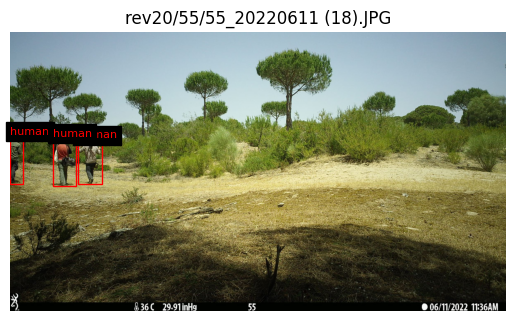

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random

PATH = "../"
input_csv_file = PATH + "Data/CSVs/test_dataset_caltech.csv"

# Load the CSV file
df = pd.read_csv(input_csv_file)

# Select a random row
random_row = df.sample(n=1, random_state=random.randint(0, 1000)).iloc[0]

# Function to plot image with YOLO bounding box
def plot_image_with_yolo_bbox(row):
    image_path = PATH + "Dataset/" + row['path']
    img = Image.open(image_path)
    img_width, img_height = img.size

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.set_title(row['path'])

    bboxes = eval(row['bounding_boxes']) if isinstance(row['bounding_boxes'], str) else []
    for bbox in bboxes:
        class_label = bbox[0]
        x_center, y_center, width, height = [float(coord) for coord in bbox[1:]]
        x_min = (x_center - width / 2) * img_width
        y_min = (y_center - height / 2) * img_height
        width = width * img_width
        height = height * img_height
        
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        ax.text(x_min, y_min, row['class'], color='r', backgroundcolor='black', fontsize=8)

    ax.axis('off')
    plt.show()

# Plot the random image with YOLO bounding box
plot_image_with_yolo_bbox(random_row)
